In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode 
from matplotlib import cm as cm
from sklearn import svm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('properati_caballito_train.csv')
cols = ['Unnamed: 0', 'Unnamed: 0.1','place_name', 'precio_m2_usd']
df.drop(cols, axis=1, inplace=True)
df.head(5)

,property_type,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,expenses,description,title,dummy_property_type__apartment,dummy_property_type__house,dummy_property_type__store,distSubte,distParque,dummy_pileta,dummy_balcon,dummy_patio,dummy_lavadero,dummy_cochera,dummy_luminoso,dummy_terraza,dummy_quincho,dummy_baulera,dummy_parrilla,dummy_premium,dummy_piscina,dummy_ascensor,dummy_profesional,dummy_alarma,dummy_amenities,dummy_calefaccion,dummy_pozo,dummy_gimnasio,dummy_aire acondicionado,dummy_spa,dummy_jacuzzi,dummy_cine
0,apartment,-34.622211,-58.439128,110000,50,2200.000000,NaN,Departamento de 3 Ambientes al Contrafrente. S...,CABALLITO 3 AMB. EN VENTA Listo para escriturar,1,0,0,0.274837,0.257798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,apartment,-34.623894,-58.446861,170500,100,1705.000000,NaN,14 exclusivos semi-pisos.Excelentes detalles d...,Semi-Pisos de gran categoria.,1,0,0,0.168539,0.471023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,apartment,-34.620928,-58.445874,220410,81,2721.111111,NaN,"Excelentes detalles de terminación, y diseño.G...",Excelencia y Calidad.,1,0,0,0.384946,0.137809,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,apartment,-34.620928,-58.445874,222780,81,2750.370370,NaN,"Excelentes detalles de terminación, y diseño.G...",Excelencia y Calidad.,1,0,0,0.384946,0.137809,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,apartment,-34.628786,-58.427783,108000,70,1542.857143,NaN,"Al frente muy luminoso.Living comedor, a balco...",Venta 3 Ambientes con dependencias,1,0,0,0.216992,1.185256,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 37 columns):
property_type                     1563 non-null object
lat                               1410 non-null float64
lon                               1410 non-null float64
price_aprox_usd                   1563 non-null int64
surface_total_in_m2               1563 non-null int64
price_usd_per_m2                  1563 non-null float64
expenses                          299 non-null float64
description                       1563 non-null object
title                             1563 non-null object
dummy_property_type__apartment    1563 non-null int64
dummy_property_type__house        1563 non-null int64
dummy_property_type__store        1563 non-null int64
distSubte                         1410 non-null float64
distParque                        1410 non-null float64
dummy_pileta                      1563 non-null int64
dummy_balcon                      1563 non-null int64
dummy_patio    

In [4]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,expenses,dummy_property_type__apartment,dummy_property_type__house,dummy_property_type__store,distSubte,distParque,dummy_pileta,dummy_balcon,dummy_patio,dummy_lavadero,dummy_cochera,dummy_luminoso,dummy_terraza,dummy_quincho,dummy_baulera,dummy_parrilla,dummy_premium,dummy_piscina,dummy_ascensor,dummy_profesional,dummy_alarma,dummy_amenities,dummy_calefaccion,dummy_pozo,dummy_gimnasio,dummy_aire acondicionado,dummy_spa,dummy_jacuzzi,dummy_cine
count,1410.000000,1410.000000,1563.000000,1563.000000,1563.000000,299.000000,1563.000000,1563.000000,1563.000000,1410.000000,1410.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,-34.618243,-58.443679,181018.971849,81.376839,2443.464926,2511.224080,0.914267,0.035189,0.015995,0.759346,0.622930,0.027511,0.103647,0.107486,0.179782,0.189379,0.159949,0.202175,0.037108,0.098528,0.241843,0.003199,0.114523,0.065259,0.161868,0.002559,0.107486,0.046065,0.047345,0.035189,0.090211,0.166987,0.051184,0.049264
std,0.007921,0.014752,116754.295874,71.417695,1160.808475,2443.989407,0.280058,0.184316,0.125496,0.923281,0.936343,0.163620,0.304899,0.309829,0.384129,0.391935,0.366676,0.401751,0.189087,0.298123,0.428336,0.056487,0.318548,0.247062,0.368448,0.050540,0.309829,0.209694,0.212443,0.184316,0.286576,0.373083,0.220443,0.216488
min,-34.641024,-58.538654,11706.000000,20.000000,162.588056,1.000000,0.000000,0.000000,0.000000,0.002079,0.000900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-34.623922,-58.452102,102000.000000,43.000000,2079.796265,1000.000000,1.000000,0.000000,0.000000,0.308180,0.209750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-34.618648,-58.443922,138873.000000,57.000000,2371.794872,1800.000000,1.000000,0.000000,0.000000,0.480409,0.435548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-34.613141,-58.437834,228805.000000,94.000000,2692.307692,3100.000000,1.000000,0.000000,0.000000,1.076836,0.829297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-34.577168,-58.354956,900000.000000,853.000000,29500.000000,13800.000000,1.000000,1.000000,1.000000,8.496251,8.348926,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#sns.lmplot(x="surface_total_in_m2", y="price_aprox_usd", data = df, hue = 'price_usd_per_m2', height=10, fit_reg=False);

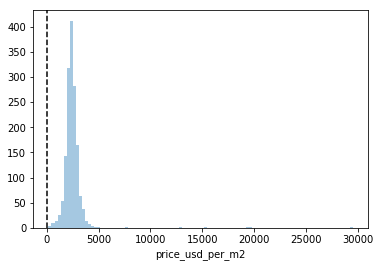

In [6]:
sns.distplot(df.loc[:,'price_usd_per_m2'], kde=False, bins= 100);
plt.axvline(0, color="k", linestyle="--");

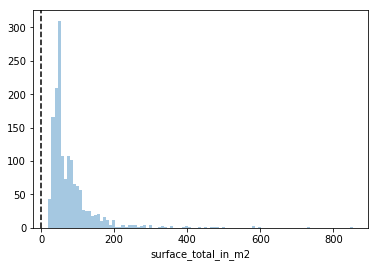

In [7]:
sns.distplot(df.loc[:,'surface_total_in_m2'], kde=False, bins= 100);
plt.axvline(0, color="k", linestyle="--");

In [8]:
#df.isnull().sum()
print(df.shape)

(1563, 37)


In [9]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr());

In [10]:
k = 36
cols = df.corr().nlargest(k,'price_usd_per_m2')['price_usd_per_m2'].index
cm = df[cols].corr()
#plt.figure(figsize=(20,15))
#sns.heatmap(cm, annot=True, cmap = 'OrRd');

## DF MINI

In [11]:
df_mini_Y = df.dropna()

In [12]:
#df_mini_Y.isna().sum()
print(df_mini_Y.shape)

(258, 37)


In [13]:
cols = ['property_type','price_aprox_usd',
       'price_usd_per_m2', 'description', 'title']
df_mini_X = df_mini_Y.drop(cols, axis=1)
df_mini_X.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'expenses',
       'dummy_property_type__apartment', 'dummy_property_type__house',
       'dummy_property_type__store', 'distSubte', 'distParque', 'dummy_pileta',
       'dummy_balcon', 'dummy_patio', 'dummy_lavadero', 'dummy_cochera',
       'dummy_luminoso', 'dummy_terraza', 'dummy_quincho', 'dummy_baulera',
       'dummy_parrilla', 'dummy_premium', 'dummy_piscina', 'dummy_ascensor',
       'dummy_profesional', 'dummy_alarma', 'dummy_amenities',
       'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')

In [14]:
k = 36
cols = df_mini_Y.corr().nlargest(k,'price_usd_per_m2')['price_usd_per_m2'].index
cm = df_mini_Y[cols].corr()
#plt.figure(figsize=(20,15))
#sns.heatmap(cm, annot=True, cmap = 'OrRd');

In [15]:
# Seleccionar modelo
from sklearn.linear_model import LinearRegression
# Elegir hiperparámetros
model = LinearRegression(fit_intercept=True)
# Preparar los datos en una matriz de features
# Crear X e y
X = df_mini_X #2 dimensiones
y = df_mini_Y['price_usd_per_m2'] #1 dimensión

# Split entrenamiento / testeo para CV
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
#Ajustar el modelo a los datos
model.fit(Xtrain, ytrain)
print (model.coef_)
print (model.intercept_)

[-2.10493826e+03 -6.18545840e+03 -4.53451091e+00  1.25106800e-01
  4.38329381e+02  2.00088834e-11  3.58113539e-11 -3.97214016e+01
  1.68452282e+02 -4.03739566e+02 -1.30042923e+02 -2.15915668e+02
  5.74326208e+00  3.26214051e+02 -7.47475213e+01 -1.11152998e+01
 -3.34348013e+02 -2.29227310e+02 -5.03920575e+01  1.93267624e-12
  5.30902948e+02 -1.23177398e+02  2.58095009e+01 -3.99530134e+01
  4.10261079e+02  8.84286401e+01 -2.41151397e+02  7.84928550e+01
  3.66657576e+02  2.33756154e+01 -2.73455337e+02 -3.53366441e+02]
-432472.3793998125


In [16]:
#Evaluar
ypred = model.predict(Xtest)
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))

MAE: 274.49781578386154
MSE: 133986.0760377938
RMSE: 366.04108517732516
R2: 0.54499220667216


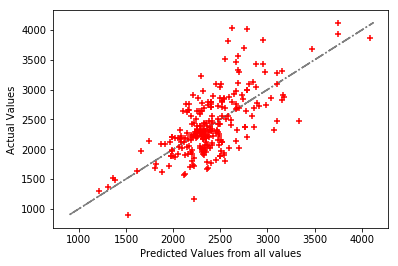

MSE: 140749.9171875382
                                           0
lat                            -2.144757e+03
lon                            -7.624491e+03
surface_total_in_m2            -4.513563e+00
expenses                        1.249552e-01
dummy_property_type__apartment  5.179687e+02
dummy_property_type__house      1.068656e-10
dummy_property_type__store     -4.158096e-11
distSubte                      -2.645136e+01
distParque                      1.983855e+02
dummy_pileta                   -7.936071e+01
dummy_balcon                   -1.440814e+02
dummy_patio                    -2.360417e+02
dummy_lavadero                 -1.242419e+01
dummy_cochera                   2.861402e+02
dummy_luminoso                 -1.048497e+02
dummy_terraza                   9.401239e+01
dummy_quincho                  -3.617033e+02
dummy_baulera                  -2.099887e+02
dummy_parrilla                 -8.679386e+01
dummy_premium                   1.227818e-11
dummy_piscina                   

In [17]:
def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

lm = linear_model.LinearRegression()
X = df_mini_X
y = df_mini_Y['price_usd_per_m2']
model = lm.fit(X, y)
predictions = model.predict(X)

# Plot the model
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all values")
plt.ylabel("Actual Values")
plt.show()
print ("MSE:", mean_squared_error(y, predictions))
print (sum_mod(model, X))

In [18]:
cols = ['property_type','price_aprox_usd',
       'price_usd_per_m2', 'description', 'title','expenses']
df_mini_X_sin_expensas = df_mini_Y.drop(cols, axis=1)

In [19]:
# Seleccionar modelo
from sklearn.linear_model import LinearRegression
# Elegir hiperparámetros
model = LinearRegression(fit_intercept=True)
# Preparar los datos en una matriz de features
# Crear X e y
Xb = df_mini_X_sin_expensas #2 dimensiones
yb = df_mini_Y['price_usd_per_m2'] #1 dimensión

# Split entrenamiento / testeo para CV
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xb, yb, random_state=1)
#Ajustar el modelo a los datos
model.fit(Xtrain, ytrain)
print (model.coef_)
print (model.intercept_)

[-4.48893842e+03 -2.55874425e+01 -1.15240931e+00  7.21042232e+02
 -2.92743607e-12  1.98951966e-13 -7.11051845e+01  1.16434967e+02
 -1.04895969e+01 -8.30539304e+01 -3.38312675e+02  3.25723645e+01
  3.91509023e+02 -4.35711109e+01 -1.00954871e+02 -4.94988422e+02
 -1.71772517e+02 -2.09733465e+01  2.62900812e-13  5.53058109e+02
 -1.79477576e+02  6.08343748e+01 -2.69662975e+00  2.25967520e+02
  9.95250121e+01 -3.29736064e+02  3.97854800e+02  4.23912432e+02
  1.43747611e+02 -4.20543875e+02 -4.33336813e+02]
-155182.0798181887


In [20]:
#Evaluar
ypred = model.predict(Xtest)
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))

MAE: 323.638250122062
MSE: 169934.23818894755
RMSE: 412.230806938234
R2: 0.4229146414632642


### DF más grande tirando columna expenses

In [21]:
# Y
cols = ['property_type', 'description', 'title', 'expenses']
df_no_expenses_Y = df.drop(cols, axis=1)
df_no_expenses_Y = df_no_expenses_Y.dropna()
print(df_no_expenses_Y.columns) 
print(df_no_expenses_Y.shape)

Index(['lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'price_usd_per_m2', 'dummy_property_type__apartment',
       'dummy_property_type__house', 'dummy_property_type__store', 'distSubte',
       'distParque', 'dummy_pileta', 'dummy_balcon', 'dummy_patio',
       'dummy_lavadero', 'dummy_cochera', 'dummy_luminoso', 'dummy_terraza',
       'dummy_quincho', 'dummy_baulera', 'dummy_parrilla', 'dummy_premium',
       'dummy_piscina', 'dummy_ascensor', 'dummy_profesional', 'dummy_alarma',
       'dummy_amenities', 'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')
(1410, 33)


In [22]:
# X
cols = ['price_aprox_usd','price_usd_per_m2']
df_no_expenses_X = df_no_expenses_Y.drop(cols, axis=1)
print(df_no_expenses_X.columns)
print(df_no_expenses_X.shape)

Index(['lat', 'lon', 'surface_total_in_m2', 'dummy_property_type__apartment',
       'dummy_property_type__house', 'dummy_property_type__store', 'distSubte',
       'distParque', 'dummy_pileta', 'dummy_balcon', 'dummy_patio',
       'dummy_lavadero', 'dummy_cochera', 'dummy_luminoso', 'dummy_terraza',
       'dummy_quincho', 'dummy_baulera', 'dummy_parrilla', 'dummy_premium',
       'dummy_piscina', 'dummy_ascensor', 'dummy_profesional', 'dummy_alarma',
       'dummy_amenities', 'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')
(1410, 31)


In [23]:
k = 36
cols = df_no_expenses_Y.corr().nlargest(k,'price_usd_per_m2')['price_usd_per_m2'].index
cm = df_no_expenses_Y[cols].corr()
#plt.figure(figsize=(20,15))
#sns.heatmap(cm, annot=True, cmap = 'OrRd');

In [24]:
# Seleccionar modelo
from sklearn.linear_model import LinearRegression
# Elegir hiperparámetros
model_1 = LinearRegression(fit_intercept=True)
# Preparar los datos en una matriz de features
# Crear X e y
X1 = df_no_expenses_X #2 dimensiones
y1 = df_no_expenses_Y['price_aprox_usd'] #1 dimensión

# Split entrenamiento / testeo para CV
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, random_state=1)
#Ajustar el modelo a los datos
model_1.fit(Xtrain, ytrain)
print (model_1.coef_)
print (model_1.intercept_)

[-699992.59214236  187977.88265855    1393.28905827   49640.51349515
   10407.03279783  -15614.787909      2850.00298112   -3292.98518562
   -1431.04898483   -8193.72027222    6461.74660081    8892.35662771
   36299.05609176   -8317.61503716   13399.59315541    4231.3301916
    1138.79249641   -3222.81491738   18682.79755563   24533.31117931
  -16055.38351954  -21336.81800957   -8721.34344449    9327.34075247
    6769.98159397  -37579.92771665  -17451.17996756   14647.19688405
   20957.06905337  -35094.35204534    4898.55630255]
-13233827.037587563


In [25]:
#Evaluar
ypred = model_1.predict(Xtest)
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(ytest, ypred))
print ('MSE:', metrics.mean_squared_error(ytest, ypred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print ('R2:', metrics.r2_score(ytest, ypred))

MAE: 40813.89528967789
MSE: 5641212131.874432
RMSE: 75108.00311467767
R2: 0.6346323976923647


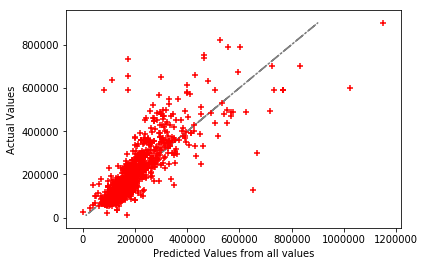

MSE: 4448787584.656969


In [26]:
def sum_mod(model, Xa):
    a = pd.DataFrame(model.coef_ , Xa.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(Xa, ya)], index=['Intecept','R2']))
    return(a)

lm = linear_model.LinearRegression()
Xa = df_no_expenses_X
ya = df_no_expenses_Y['price_aprox_usd']
model = lm.fit(Xa, ya)
predictions = model.predict(Xa)

# Plot the model
plt.plot(ya,ya, '-.',c='grey')
plt.scatter(predictions, ya, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from all values")
plt.ylabel("Actual Values")
plt.show()
print ("MSE:", mean_squared_error(ya, predictions))
#print (sum_mod(model, Xa))

## LASSO sobre DS sin expensas

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
model = Lasso()
model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [28]:
df_random = df.sample(frac=1,random_state = 42)
cols = ['property_type', 'description', 'title', 'expenses']
df_no_expenses_Y_lasso = df_random.drop(cols, axis=1)
df_no_expenses_Y_lasso = df_no_expenses_Y_lasso.dropna()
print (df_no_expenses_Y_lasso.shape)

(1410, 33)


In [29]:
cols = ['price_aprox_usd','price_usd_per_m2']
df_no_expenses_X_lasso = df_no_expenses_Y_lasso.drop(cols, axis=1)
print (df_no_expenses_X_lasso.shape)

(1410, 31)


In [30]:
Y_lasso = df_no_expenses_Y_lasso

In [31]:
X_lasso = df_no_expenses_X_lasso

In [32]:
results = cross_val_score(model,X_lasso,Y_lasso,cv=5)
print(results)
print(np.mean(results))
print(np.std(results))

[0.70693747 0.59797841 0.6501397  0.65793559 0.60669014]
0.6439362602574749
0.039250511278245234


In [33]:
model.fit(X_lasso,Y_lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
model.coef_

array([[      0.        ,      -0.        ,      -0.        , ...,
              0.        ,      -0.        ,       0.        ],
       [     -0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,      -0.        ],
       [     -0.        , -144919.89602452,    1350.78469094, ...,
          17485.70846975,  -39822.61128464,   -1118.31489261],
       ...,
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [     -0.        ,       0.        ,      -0.        , ...,
              0.        ,       0.        ,       0.        ],
       [      0.        ,      -0.        ,      -0.        , ...,
              0.        ,       0.        ,       0.        ]])

In [35]:
X_lasso.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'dummy_property_type__apartment',
       'dummy_property_type__house', 'dummy_property_type__store', 'distSubte',
       'distParque', 'dummy_pileta', 'dummy_balcon', 'dummy_patio',
       'dummy_lavadero', 'dummy_cochera', 'dummy_luminoso', 'dummy_terraza',
       'dummy_quincho', 'dummy_baulera', 'dummy_parrilla', 'dummy_premium',
       'dummy_piscina', 'dummy_ascensor', 'dummy_profesional', 'dummy_alarma',
       'dummy_amenities', 'dummy_calefaccion', 'dummy_pozo', 'dummy_gimnasio',
       'dummy_aire acondicionado', 'dummy_spa', 'dummy_jacuzzi', 'dummy_cine'],
      dtype='object')

## Selección del mejor alpha

In [36]:
model_lassoCV = linear_model.MultiTaskLassoCV()
results = cross_val_score(model_lassoCV,X_lasso,Y_lasso,cv=5,scoring='r2')

C:\Users\tokai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tokai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tokai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tokai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

In [37]:
np.mean(results)

0.06570784757371838

In [38]:
np.std(results)

0.0050922537624390855

In [39]:
model_lassoCV.fit(X_lasso,Y_lasso)

C:\Users\tokai\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


MultiTaskLassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
         fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
         normalize=False, random_state=None, selection='cyclic',
         tol=0.0001, verbose=False)

In [40]:
model_lassoCV.alpha_

339578.5322515888